In [12]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC

In [10]:
data = pd.read_csv("C:/Users/KritikaSingh/Documents/College/Semester 1/Data Mining_CS_5310/BDParkinson_Prediction.csv")
dataset = pd.DataFrame(data, columns=['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'CLASS'])


In [4]:
#understanding the data 
data.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066,Class_1


In [5]:
#shape
data.shape

(500, 7)

In [6]:
#describe
data.describe

<bound method NDFrame.describe of          VAR1      VAR2      VAR3      VAR4      VAR5      VAR6    CLASS
0    0.624731  0.135424  0.000000  0.675282  0.182203  0.962960  Class_1
1    0.647223  0.136211  0.000000  0.679511  0.195903  0.987387  Class_1
2    0.706352  0.187593  0.000000  0.632989  0.244884  0.991182  Class_1
3    0.680291  0.192076  0.000000  0.651786  0.233528  0.991857  Class_1
4    0.660104  0.161131  0.000000  0.677162  0.209531  0.991066  Class_1
..        ...       ...       ...       ...       ...       ...      ...
495  0.712586  0.219776  0.510939  0.593045  0.268087  0.092055  Class_4
496  0.686058  0.224004  0.518661  0.600564  0.253298  0.093827  Class_4
497  0.698661  0.216604  0.505791  0.591165  0.241696  0.090734  Class_4
498  0.714926  0.222613  0.562420  0.587406  0.271037  0.093245  Class_4
499  0.698690  0.219577  0.541828  0.583647  0.258280  0.091973  Class_4

[500 rows x 7 columns]>

In [11]:
# Statistical Summary

# descriptions
print(dataset.describe())

# Class Distribution

# class distribution
print(dataset.groupby('CLASS').size())

             VAR1        VAR2        VAR3        VAR4        VAR5        VAR6
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000
mean     0.735121    0.197308    0.467928    0.696034    0.282903    0.314853
std      0.075174    0.068170    0.302631    0.144894    0.105843    0.391511
min      0.613236    0.109302    0.000000    0.515038    0.140636    0.045782
25%      0.671658    0.134198    0.274775    0.576128    0.216137    0.090241
50%      0.716317    0.218196    0.527671    0.642387    0.268986    0.102930
75%      0.805635    0.246461    0.585586    0.737429    0.341426    0.616969
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
CLASS
Class2     125
Class_1    125
Class_3    125
Class_4    125
dtype: int64


count    500.000000
mean       0.735121
std        0.075174
min        0.613236
25%        0.671658
50%        0.716317
75%        0.805635
max        1.000000
Name: VAR1, dtype: float64


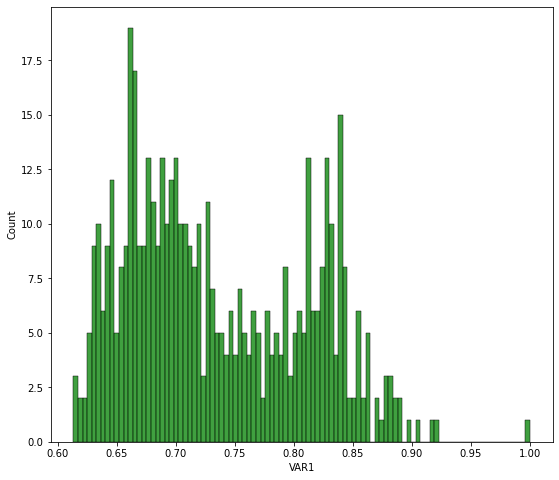

In [17]:
print(dataset['VAR1'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset['VAR1'], color='g', bins=100, kde_kws={'alpha': 0.4});

count    500.000000
mean       0.197308
std        0.068170
min        0.109302
25%        0.134198
50%        0.218196
75%        0.246461
max        1.000000
Name: VAR2, dtype: float64


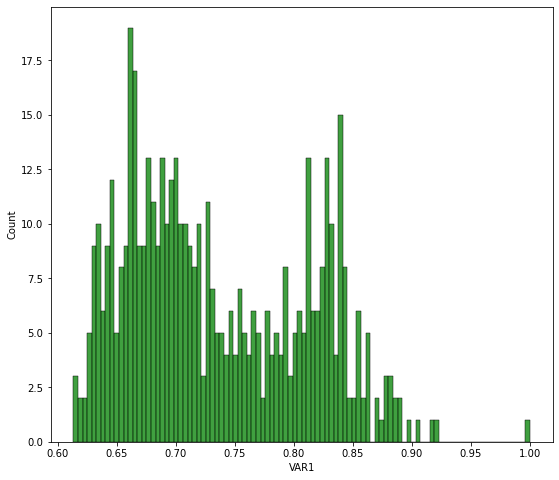

In [19]:
print(dataset['VAR2'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset['VAR1'], color='g', bins=100, kde_kws={'alpha': 0.4});

count    500.000000
mean       0.467928
std        0.302631
min        0.000000
25%        0.274775
50%        0.527671
75%        0.585586
max        1.000000
Name: VAR3, dtype: float64


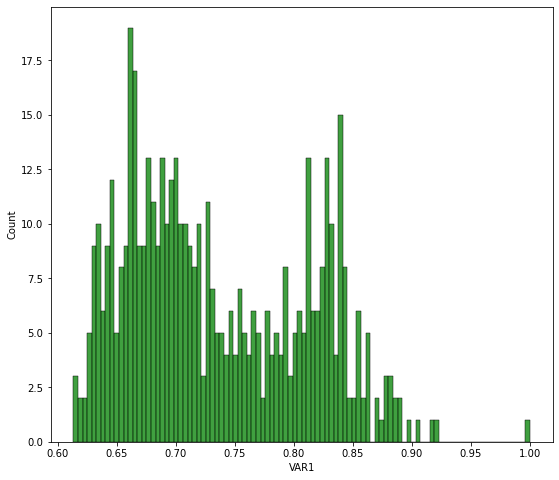

In [20]:
print(dataset['VAR3'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset['VAR1'], color='g', bins=100, kde_kws={'alpha': 0.4});

count    500.000000
mean       0.696034
std        0.144894
min        0.515038
25%        0.576128
50%        0.642387
75%        0.737429
max        1.000000
Name: VAR4, dtype: float64


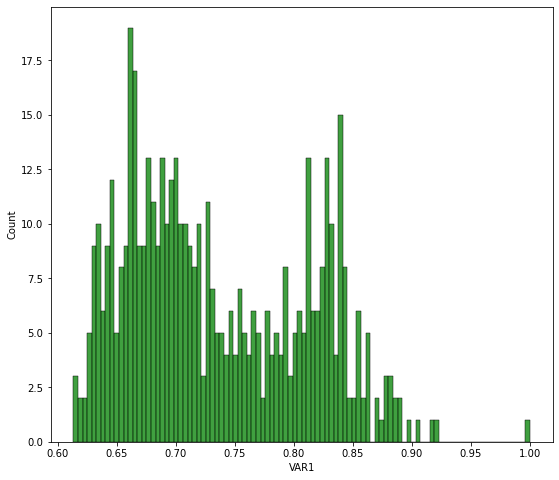

In [21]:
print(dataset['VAR4'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset['VAR1'], color='g', bins=100, kde_kws={'alpha': 0.4});

count    500.000000
mean       0.282903
std        0.105843
min        0.140636
25%        0.216137
50%        0.268986
75%        0.341426
max        1.000000
Name: VAR5, dtype: float64


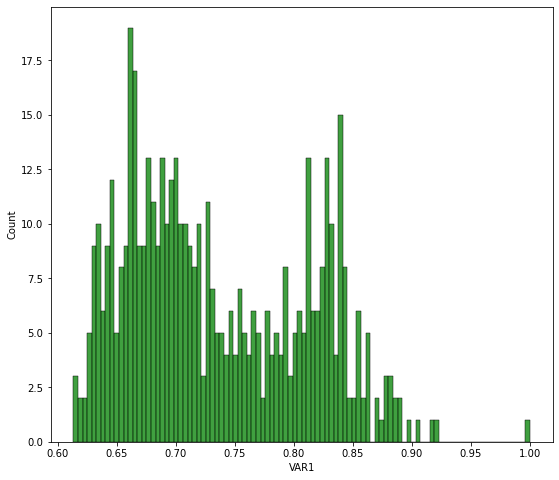

In [22]:
print(dataset['VAR5'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset['VAR1'], color='g', bins=100, kde_kws={'alpha': 0.4});

count    500.000000
mean       0.314853
std        0.391511
min        0.045782
25%        0.090241
50%        0.102930
75%        0.616969
max        1.000000
Name: VAR6, dtype: float64


C:\Users\KritikaSingh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


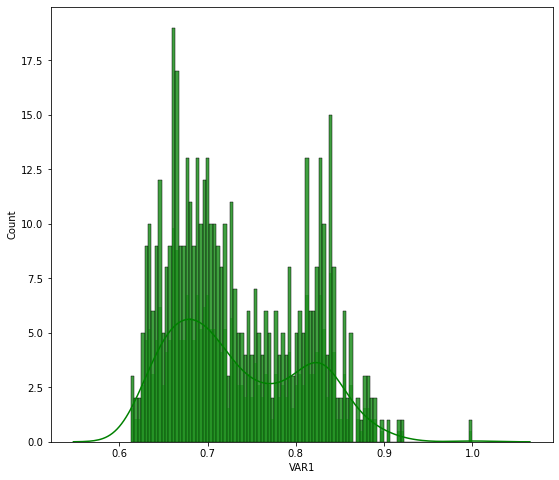

In [26]:
print(dataset['VAR6'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset['VAR1'], color='g', bins=100, kde_kws={'alpha': 0.4});
sns.distplot(dataset['VAR1'], color='g', bins=100, hist_kws={'alpha': 0.4});

count         500
unique          4
top       Class_1
freq          125
Name: CLASS, dtype: object


C:\Users\KritikaSingh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


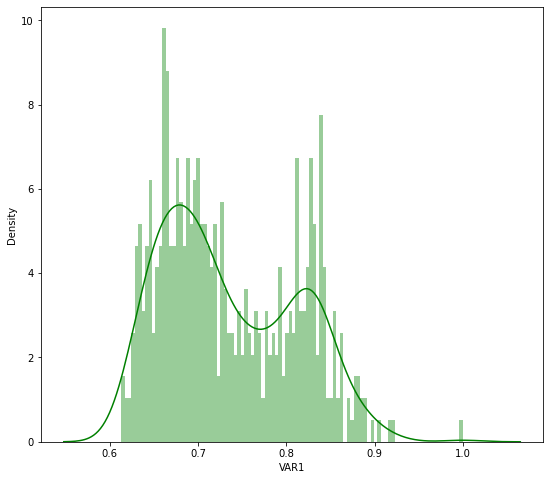

In [25]:
print(dataset['CLASS'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['VAR1'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
Numerical data distribution
For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:


In [27]:
print(dataset)

         VAR1      VAR2      VAR3      VAR4      VAR5      VAR6    CLASS
0    0.624731  0.135424  0.000000  0.675282  0.182203  0.962960  Class_1
1    0.647223  0.136211  0.000000  0.679511  0.195903  0.987387  Class_1
2    0.706352  0.187593  0.000000  0.632989  0.244884  0.991182  Class_1
3    0.680291  0.192076  0.000000  0.651786  0.233528  0.991857  Class_1
4    0.660104  0.161131  0.000000  0.677162  0.209531  0.991066  Class_1
..        ...       ...       ...       ...       ...       ...      ...
495  0.712586  0.219776  0.510939  0.593045  0.268087  0.092055  Class_4
496  0.686058  0.224004  0.518661  0.600564  0.253298  0.093827  Class_4
497  0.698661  0.216604  0.505791  0.591165  0.241696  0.090734  Class_4
498  0.714926  0.222613  0.562420  0.587406  0.271037  0.093245  Class_4
499  0.698690  0.219577  0.541828  0.583647  0.258280  0.091973  Class_4

[500 rows x 7 columns]


In [28]:
data.nunique()

VAR1     499
VAR2     500
VAR3     192
VAR4     257
VAR5     500
VAR6     500
CLASS      4
dtype: int64

In [31]:
data['CLASS'].unique()

array(['Class_1', 'Class2', 'Class_3', 'Class_4'], dtype=object)


 1. Strongly correlated variables: VAR3,VAR6,



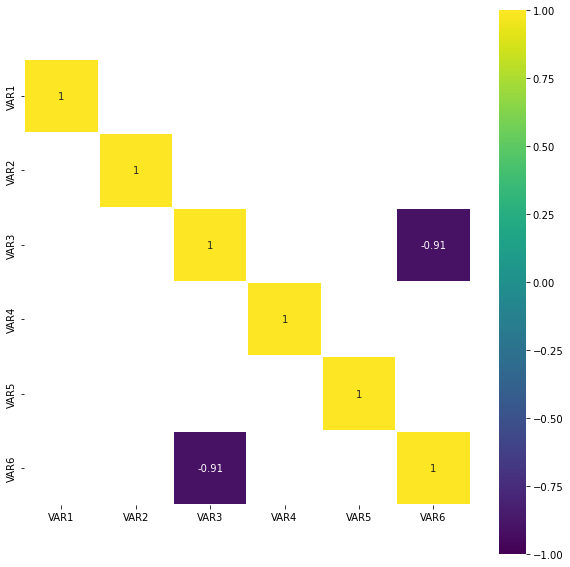

In [36]:
#Feature to feature relationship: Correlation
#Correlation: Now we'll try to find which features are strongly correlated
df_num = dataset
df_num = df_num.drop(['CLASS'], axis=1)
df_num.head()
#dataset
corr = df_num.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)],cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.1,annot=True, annot_kws={"size": 10}, square=True);
#Now lets plot them all:
print("\n 1. Strongly correlated variables: VAR3,VAR6,\n")


 1. Drop-Variables: VAR1, VAR2, VAR4, VAR5



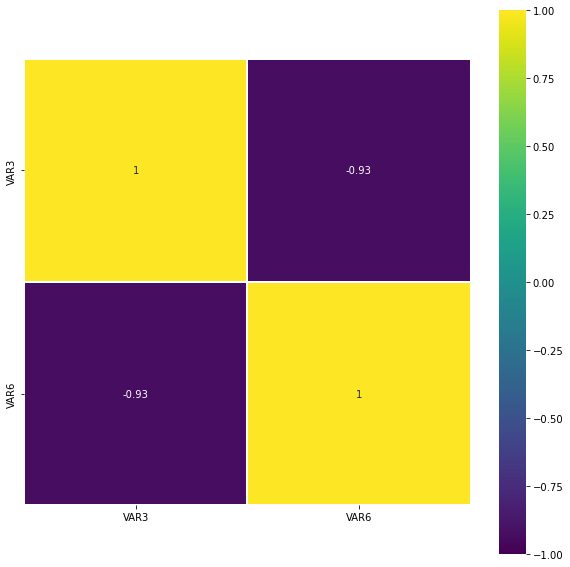

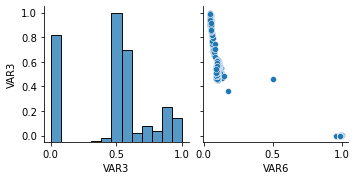

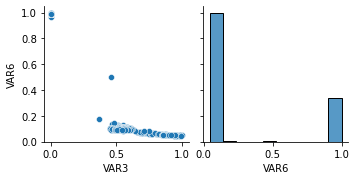

In [37]:
print("\n 1. Drop-Variables: VAR1, VAR2, VAR4, VAR5\n")
plt.figure(figsize=(10, 10))
corr2 = corr.drop(['VAR1', 'VAR2', 'VAR4', 'VAR5'], axis=1)
corr2 = corr2.corr()
sns.heatmap(corr2[(corr2 >= 0.9) | (corr2 <= -0.9)],cmap='viridis',vmax=1.0,vmin=-1.0,linewidths=0.1,annot=True, annot_kws={"size": 10}, square=True);
for i in range(0, len(corr2.columns), 4):
     sns.pairplot(data=dataset,x_vars=corr2.columns[i:i+9],y_vars=['VAR3'])
     sns.pairplot(data=dataset,x_vars=corr2.columns[i:i+9],y_vars=['VAR6'])


In [40]:
dataset = dataset.drop(['VAR1', 'VAR2', 'VAR4', 'VAR5'], axis=1)

In [41]:
list(set(dataset.dtypes.tolist()))

[dtype('float64'), dtype('O')]

In [42]:
df_num = dataset.select_dtypes(include = ['float64'])
df_num.head()

,VAR3,VAR6
0,0.0,0.962960
1,0.0,0.987387
2,0.0,0.991182
3,0.0,0.991857
4,0.0,0.991066


In [44]:
#Now lets plot them all:

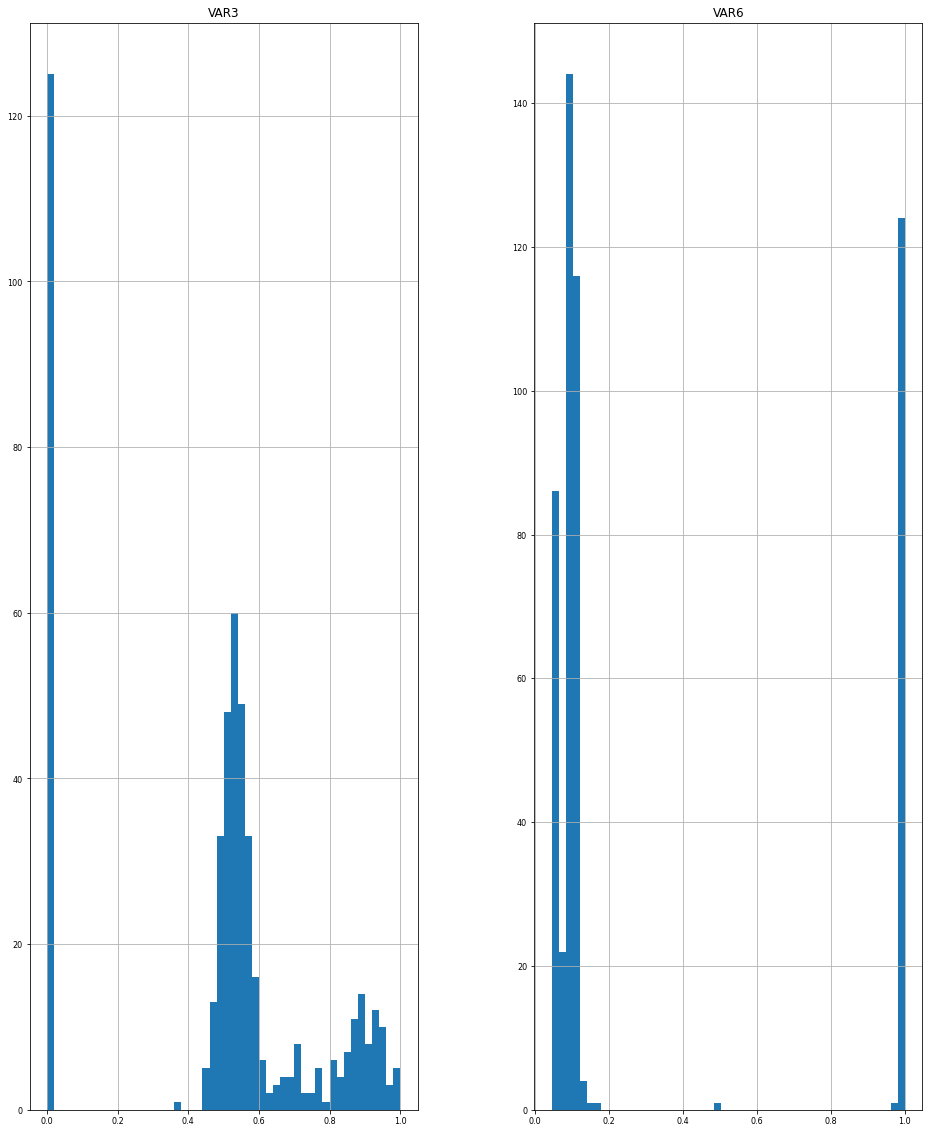

In [45]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
#Data Visualization
We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

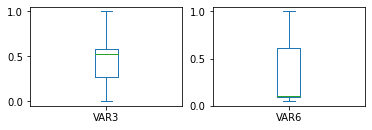

In [46]:
# box and whisker plots
df_num.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [ ]:
We can also create a histogram of each input variable to get an idea of the distribution.

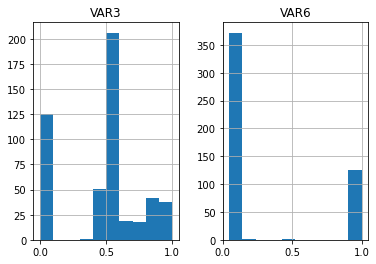

In [47]:
# histograms
df_num.hist()
plt.show()

In [ ]:
Multivariate Plots
Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

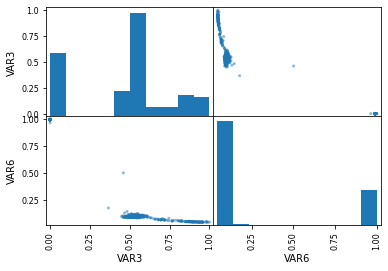

In [48]:
# scatter plot matrix
scatter_matrix(df_num)
plt.show()

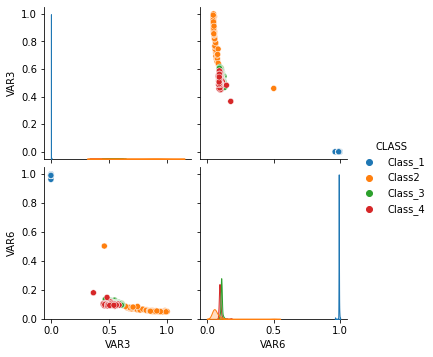

In [50]:
import seaborn as sns
sns.pairplot(dataset,hue ='CLASS');